In [1]:
import pandas as pd
import numpy as np
from statistics import mean
from numpy import std

data = pd.read_csv("Hungarian__Switzerland__Long Beach VA__Preprocess__1.csv")
data1 = pd.read_csv("Cleveland__Statlog__Preprocess__1.csv")

In [2]:
data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,28.0,1.0,2.0,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.9,0.3,2.6,0.0
1,1,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,2.0,0.0,2.7,0.0
2,2,29.0,1.0,2.0,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,2.0,0.1,2.5,0.0
3,3,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.8,0.3,2.6,0.0
4,4,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.4,0.3,2.8,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        617 non-null    int64  
 1   age       617 non-null    float64
 2   sex       617 non-null    float64
 3   cp        617 non-null    float64
 4   trestbps  617 non-null    float64
 5   chol      617 non-null    float64
 6   fbs       617 non-null    float64
 7   restecg   617 non-null    float64
 8   thalach   617 non-null    float64
 9   exang     617 non-null    float64
 10  oldpeak   617 non-null    float64
 11  slope     617 non-null    float64
 12  ca        617 non-null    float64
 13  thal      617 non-null    float64
 14  target    617 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 72.4 KB


# Main Preprocessing 1

In [4]:
data.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
#Classification columns
class_cols=["sex","target",'cp',"fbs","exang","restecg","thal","ca","slope"]
class_data=data[class_cols]

#Continuous columns
continuous_cols=["age","trestbps","chol","thalach","oldpeak"]
continuous_data=data[continuous_cols]

In [6]:
for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trestbps outliers = 19 => 3.079%
Column chol outliers = 71 => 11.507%
Column thalach outliers = 3 => 0.486%
Column oldpeak outliers = 0 => 0.0%


In [7]:
#Using log transformation
data["age"]= np.log(data.age)
data["trestbps"]= np.log(data.trestbps)
data["chol"]= np.log(data.chol)
data["thalach"]= np.log(data.thalach)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trestbps","chol","thalach","oldpeak"]
continuous_data=data[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.20)
        q3 = v.quantile(0.80)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.162%
Column trestbps outliers = 1 => 0.162%
Column chol outliers = 53 => 8.59%
Column thalach outliers = 3 => 0.486%
Column oldpeak outliers = 0 => 0.0%


C:\Users\mahmu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
data.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,114.220421,3.954888,0.842788,3.301459,4.876567,-inf,0.201662,0.414229,4.852134,0.442460,0.821296,1.444136,0.919530,2.313776,0.599676
std,76.843512,0.189094,0.364296,0.899069,0.128958,NaN,0.352349,0.610128,0.189738,0.476106,0.954952,0.479962,0.471634,0.276319,0.490362
min,0.000000,3.332205,0.000000,1.000000,4.382027,-inf,0.000000,0.000000,4.094345,0.000000,-2.175000,0.300000,0.000000,1.600000,0.000000
25%,51.000000,3.850148,1.000000,3.000000,4.787492,5.315174,0.000000,0.000000,4.753590,0.000000,0.000000,1.000000,0.500000,2.100000,0.000000
50%,102.000000,3.988984,1.000000,4.000000,4.867534,5.438079,0.000000,0.000000,4.852030,0.000000,0.653846,1.500000,0.900000,2.300000,1.000000
75%,169.000000,4.094345,1.000000,4.000000,4.941642,5.570632,0.300000,1.000000,4.997212,1.000000,1.500000,1.800000,1.300000,2.500000,1.000000
max,293.000000,4.343805,1.000000,4.000000,5.247024,6.092158,1.000000,2.000000,5.247024,1.000000,3.625000,3.000000,1.900000,2.900000,1.000000


### Main Preprocessing 2

In [9]:
#Classification columns
class_cols1=["sex","target",'cp',"fbs","exang","restecg","thal","ca","slope"]
class_data1=data1[class_cols]

#Continuous columns
continuous_cols1=["age","trestbps","chol","thalach","oldpeak"]
continuous_data1=data1[continuous_cols]

In [10]:
for k, v in continuous_data1.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trestbps outliers = 24 => 4.188%
Column chol outliers = 5 => 0.873%
Column thalach outliers = 1 => 0.175%
Column oldpeak outliers = 14 => 2.443%


In [11]:
#Using log transformation
data1["age"]= np.log(data1.age)
data1["trestbps"]= np.log(data1.trestbps)
data1["chol"]= np.log(data1.chol)
data1["thalach"]= np.log(data1.thalach)
print("---Log Transform performed---")

#Outliners again
continuous_cols1=["age","trestbps","chol","thalach","oldpeak"]
continuous_data1=data1[continuous_cols1]

for k, v in continuous_data1.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 2 => 0.349%
Column trestbps outliers = 4 => 0.698%
Column chol outliers = 5 => 0.873%
Column thalach outliers = 7 => 1.222%
Column oldpeak outliers = 14 => 2.443%


In [12]:
df = data.append(data1)

C:\Users\mahmu\AppData\Local\Temp\ipykernel_6928\234181783.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data.append(data1)


# Train Test Split

In [13]:
#Data Splitting
from sklearn.model_selection import train_test_split
#X=data.iloc[:,:13]
X = df.drop(['target'], axis = 1)
Y =df["target"]


In [14]:
X = X[['age','cp', 'trestbps', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']]
# x_test = x_test[['age','cp', 'trestbps', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']]

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(Y)
print('Before', counter)
smt = SMOTE()
X,Y = smt.fit_resample(X,Y)
counter = Counter(Y)
print('After', counter)

Before Counter({1.0: 655, 0.0: 535})
After Counter({0.0: 655, 1.0: 655})


In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

ss = StandardScaler()
X = ss.fit_transform(X)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2) # 80% training and 20% test

In [19]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

# Support Vector Classifier Train, Test 

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))





0.8053435114503816
[[ 98  28]
 [ 23 113]]
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       126
         1.0       0.80      0.83      0.82       136

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



# Performance Measure of SVC

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 98  28]
 [ 23 113]]
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       126
         1.0       0.80      0.83      0.82       136

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



In [22]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.805505704497244
f1 Score  0.8051301315903835
Recall  0.8053435114503816
Specificity/TNR: 0.7777777777777778
Cohen Kappa: 0.6095494126585237
AUC Score  0.872140522875817


In [23]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
svc_performances = [svc_acc, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817]}

# Decision Tree Classifier Train, Test

In [24]:
from sklearn import tree
from sklearn.metrics import accuracy_score

modelDTC = tree.DecisionTreeClassifier()
modelDTC.fit(x_train, y_train)
print(modelDTC.score(x_test, y_test))

# Predicting the Test set results
y_pred = modelDTC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)

0.7748091603053435
0.7748091603053435


# Performance Measure of DTC

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelDTC.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 97  29]
 [ 30 106]]
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       126
         1.0       0.79      0.78      0.78       136

    accuracy                           0.77       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.77      0.77      0.77       262



In [26]:
from sklearn.metrics import cohen_kappa_score
cmDTC = confusion_matrix(y_test, modelDTC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmDTC[1,1]  
TN = cmDTC[0,0] 
FP = cmDTC[0,1] 
FN = cmDTC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalDTC=sum(sum(cmDTC))
Accuracy = (TN+TP)/totalDTC
# MCC
val = (TP * TN) - (FP * FN)
MCC_DTC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelDTC.predict(x_test)
pred_prob = modelDTC.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.7748908612886494
f1 Score  0.7748387202364617
Recall  0.7748091603053435
Specificity/TNR: 0.7698412698412699
Cohen Kappa: 0.5490928183886588
AUC Score  0.7746265172735761


In [27]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
dtc_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['DT'] = dtc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817],
 'DT': [0.7748091603053435,
  0.7748908612886494,
  0.7748091603053435,
  0.7748387202364617,
  0.7698412698412699,
  0.5490928183886588,
  0.7746265172735761]}

# Random Forest Classifier Train, Test

In [28]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

modelRFC = ensemble.RandomForestClassifier(n_estimators = 100) # by default n_estimators = 100
modelRFC.fit(x_train, y_train)
print(modelRFC.score(x_test, y_test))


# Predicting the Test set results
y_pred = modelRFC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8435114503816794
0.8435114503816794


# Performance Measure of RFC

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelRFC.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107  19]
 [ 22 114]]
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       126
         1.0       0.86      0.84      0.85       136

    accuracy                           0.84       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.84      0.84      0.84       262



In [30]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelRFC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelRFC.predict(x_test)
pred_prob = modelRFC.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8438284598412416
f1 Score  0.8435593585315735
Recall  0.8435114503816794
Specificity/TNR: 0.8492063492063492
Cohen Kappa: 0.6868404174683692
AUC Score  0.9197012138188609


In [31]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
rfc_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['RF'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817],
 'DT': [0.7748091603053435,
  0.7748908612886494,
  0.7748091603053435,
  0.7748387202364617,
  0.7698412698412699,
  0.5490928183886588,
  0.7746265172735761],
 'RF': [0.8435114503816794,
  0.8438284598412416,
  0.8435114503816794,
  0.8435593585315735,
  0.8492063492063492,
  0.6868404174683692,
  0.9197012138188609]}

### XGBoost

In [32]:
# Training the Naive Bayes model on the Training set
import xgboost as xgb
from sklearn.metrics import accuracy_score

modelXGB = xgb.XGBClassifier()

modelXGB.fit(x_train, y_train)
#print('Training',modelXGB.score(x_train, y_train))
# Predicting the Test set results
y_pred = modelXGB.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Testing',ac)
cmXGB = confusion_matrix(y_test, y_pred)
cmXGB

Testing 0.851145038167939


array([[109,  17],
       [ 22, 114]], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelXGB.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109  17]
 [ 22 114]]
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       126
         1.0       0.87      0.84      0.85       136

    accuracy                           0.85       262
   macro avg       0.85      0.85      0.85       262
weighted avg       0.85      0.85      0.85       262



In [34]:
from sklearn.metrics import cohen_kappa_score
cmXNB = confusion_matrix(y_test, modelXGB.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmXGB[1,1]  
TN = cmXGB[0,0] 
FP = cmXGB[0,1] 
FN = cmXGB[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalXGB=sum(sum(cmXGB))
Accuracy = (TN+TP)/totalXGB
# MCC
val = (TP * TN) - (FP * FN)
MCC_XGB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelXGB.predict(x_test)


pred_prob = modelXGB.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8518734339490707
f1 Score  0.8511992705823693
Recall  0.851145038167939
Specificity/TNR: 0.8650793650793651
Cohen Kappa: 0.7022900763358779
AUC Score  0.9064542483660131


In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
xgb_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['XGB'] = xgb_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817],
 'DT': [0.7748091603053435,
  0.7748908612886494,
  0.7748091603053435,
  0.7748387202364617,
  0.7698412698412699,
  0.5490928183886588,
  0.7746265172735761],
 'RF': [0.8435114503816794,
  0.8438284598412416,
  0.8435114503816794,
  0.8435593585315735,
  0.8492063492063492,
  0.6868404174683692,
  0.9197012138188609],
 'XGB': [0.851145038167939,
  0.8518734339490707,
  0.851145038167939,
  0.8511992705823693,
  0.8650793650793651,
  0.7022900763358779,
  0.9064542483660131]}

# Logistic Regression Train, Test

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)
print(modelLR.score(x_test, y_test))


# Predicting the Test set results
y_pred = modelLR.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)

0.6755725190839694
0.6755725190839694


# Performance Measure of LR

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelLR.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84 42]
 [43 93]]
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66       126
         1.0       0.69      0.68      0.69       136

    accuracy                           0.68       262
   macro avg       0.68      0.68      0.68       262
weighted avg       0.68      0.68      0.68       262



In [38]:
from sklearn.metrics import cohen_kappa_score
cmLR = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmLR[1,1]  
TN = cmLR[0,0] 
FP = cmLR[0,1] 
FN = cmLR[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalLR=sum(sum(cmLR))
Accuracy = (TN+TP)/totalLR
# MCC
val = (TP * TN) - (FP * FN)
MCC_LR = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.6756773723895201
f1 Score  0.6756151054254108
Recall  0.6755725190839694
Specificity/TNR: 0.6666666666666666
Cohen Kappa: 0.3503879586955254
AUC Score  0.7237978524743232


In [39]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
lr_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['LR'] = lr_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817],
 'DT': [0.7748091603053435,
  0.7748908612886494,
  0.7748091603053435,
  0.7748387202364617,
  0.7698412698412699,
  0.5490928183886588,
  0.7746265172735761],
 'RF': [0.8435114503816794,
  0.8438284598412416,
  0.8435114503816794,
  0.8435593585315735,
  0.8492063492063492,
  0.6868404174683692,
  0.9197012138188609],
 'XGB': [0.851145038167939,
  0.8518734339490707,
  0.851145038167939,
  0.8511992705823693,
  0.8650793650793651,
  0.7022900763358779,
  0.9064542483660131],
 'LR': [0.6755725190839694,
  0.6756773723895201,
  0.6755725190839694,
  0.6756151054254108,
  0.6666666666666666,
  0.3503879586955254,
  0.7237978524743232]}

# KNN Train, Test

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2)
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8053435114503816
0.8053435114503816


# Performance Measure of KNN

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelKNN.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[104  22]
 [ 29 107]]
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       126
         1.0       0.83      0.79      0.81       136

    accuracy                           0.81       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.81      0.81      0.81       262



In [42]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

Precision  0.806612661602524
f1 Score  0.8054030697844611
Recall  0.8053435114503816
Specificity/TNR: 0.8253968253968254
Cohen Kappa: 0.6109137499272028
AUC Score  0.8402777777777777


{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817],
 'DT': [0.7748091603053435,
  0.7748908612886494,
  0.7748091603053435,
  0.7748387202364617,
  0.7698412698412699,
  0.5490928183886588,
  0.7746265172735761],
 'RF': [0.8435114503816794,
  0.8438284598412416,
  0.8435114503816794,
  0.8435593585315735,
  0.8492063492063492,
  0.6868404174683692,
  0.9197012138188609],
 'XGB': [0.851145038167939,
  0.8518734339490707,
  0.851145038167939,
  0.8511992705823693,
  0.8650793650793651,
  0.7022900763358779,
  0.9064542483660131],
 'LR': [0.6755725190839694,
  0.6756773723895201,
  0.6755725190839694,
  0.6756151054254108,
  0.6666666666666666,
  0.3503879586955254,
  0.7237978524743232],
 'KNN': [0.8053435114503816,
  0.806612661602524,
  0.8053435114503816,
  0.80540306978

In [43]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817],
 'DT': [0.7748091603053435,
  0.7748908612886494,
  0.7748091603053435,
  0.7748387202364617,
  0.7698412698412699,
  0.5490928183886588,
  0.7746265172735761],
 'RF': [0.8435114503816794,
  0.8438284598412416,
  0.8435114503816794,
  0.8435593585315735,
  0.8492063492063492,
  0.6868404174683692,
  0.9197012138188609],
 'XGB': [0.851145038167939,
  0.8518734339490707,
  0.851145038167939,
  0.8511992705823693,
  0.8650793650793651,
  0.7022900763358779,
  0.9064542483660131],
 'LR': [0.6755725190839694,
  0.6756773723895201,
  0.6755725190839694,
  0.6756151054254108,
  0.6666666666666666,
  0.3503879586955254,
  0.7237978524743232],
 'KNN': [0.8053435114503816,
  0.806612661602524,
  0.8053435114503816,
  0.80540306978

# Multilayer Perceptron Train, Test

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# with HT it will give at most 87%
modelMLP = MLPClassifier()
modelMLP.fit(x_train, y_train)
print(modelMLP.score(x_test, y_test))

# Predicting the Test set results
y_pred = modelMLP.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)

0.7938931297709924
0.7938931297709924


C:\Users\mahmu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Performance Measure of MLP

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelMLP.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101  25]
 [ 29 107]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       126
         1.0       0.81      0.79      0.80       136

    accuracy                           0.79       262
   macro avg       0.79      0.79      0.79       262
weighted avg       0.79      0.79      0.79       262



In [46]:
from sklearn.metrics import cohen_kappa_score
cmMLP = confusion_matrix(y_test, modelMLP.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmMLP[1,1]  
TN = cmMLP[0,0] 
FP = cmMLP[0,1] 
FN = cmMLP[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalMLP=sum(sum(cmMLP))
Accuracy = (TN+TP)/totalMLP
# MCC
val = (TP * TN) - (FP * FN)
MCC_MLP = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelMLP.predict(x_test)
pred_prob = modelMLP.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
mlp_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['MLP'] = mlp_performances

performance_dict

Precision  0.7944073737966867
f1 Score  0.7939652287227982
Recall  0.7938931297709924
Specificity/TNR: 0.8015873015873016
Cohen Kappa: 0.5876661226393098
AUC Score  0.8373599439775911


{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Specificity',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8053435114503816,
  0.805505704497244,
  0.8053435114503816,
  0.8051301315903835,
  0.7777777777777778,
  0.6095494126585237,
  0.872140522875817],
 'DT': [0.7748091603053435,
  0.7748908612886494,
  0.7748091603053435,
  0.7748387202364617,
  0.7698412698412699,
  0.5490928183886588,
  0.7746265172735761],
 'RF': [0.8435114503816794,
  0.8438284598412416,
  0.8435114503816794,
  0.8435593585315735,
  0.8492063492063492,
  0.6868404174683692,
  0.9197012138188609],
 'XGB': [0.851145038167939,
  0.8518734339490707,
  0.851145038167939,
  0.8511992705823693,
  0.8650793650793651,
  0.7022900763358779,
  0.9064542483660131],
 'LR': [0.6755725190839694,
  0.6756773723895201,
  0.6755725190839694,
  0.6756151054254108,
  0.6666666666666666,
  0.3503879586955254,
  0.7237978524743232],
 'KNN': [0.8053435114503816,
  0.806612661602524,
  0.8053435114503816,
  0.80540306978

# Gaussian Naive Bayes Train Test

In [47]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

modelGNB = GaussianNB()
modelGNB.fit(x_train, y_train)
#print(modelGNB.score(x_train, y_train))
# Predicting the Test set results
y_pred = modelGNB.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
cm = confusion_matrix(y_test, y_pred)
cm

0.6946564885496184


array([[97, 29],
       [51, 85]], dtype=int64)

# Gaussian Naive Bayes Performance Measure

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelGNB.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[97 29]
 [51 85]]
              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71       126
         1.0       0.75      0.62      0.68       136

    accuracy                           0.69       262
   macro avg       0.70      0.70      0.69       262
weighted avg       0.70      0.69      0.69       262



In [49]:
from sklearn.metrics import cohen_kappa_score
cmGNB = confusion_matrix(y_test, modelGNB.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmGNB[1,1]  
TN = cmGNB[0,0] 
FP = cmGNB[0,1] 
FN = cmGNB[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalGNB=sum(sum(cmGNB))
Accuracy = (TN+TP)/totalGNB
# MCC
val = (TP * TN) - (FP * FN)
MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelGNB.predict(x_test)
pred_prob = modelGNB.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
gnb_performances = [ac, precision, recall, f1, specificity, cohen_score, auc_score ]
performance_dict['GNB'] = gnb_performances

#performance_dict

Precision  0.7022312589809576
f1 Score  0.6934796901989191
Recall  0.6946564885496184
Specificity/TNR: 0.7698412698412699
Cohen Kappa: 0.39232285747419693
AUC Score  0.7123015873015873


## Output

In [50]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df

,Metrics,SVC,DT,RF,XGB,LR,KNN,MLP,GNB
0,Accuracy,0.805344,0.774809,0.843511,0.851145,0.675573,0.805344,0.793893,0.694656
1,Precision,0.805506,0.774891,0.843828,0.851873,0.675677,0.806613,0.794407,0.702231
2,Recall,0.805344,0.774809,0.843511,0.851145,0.675573,0.805344,0.793893,0.694656
3,F1 Score,0.805130,0.774839,0.843559,0.851199,0.675615,0.805403,0.793965,0.693480
4,Specificity,0.777778,0.769841,0.849206,0.865079,0.666667,0.825397,0.801587,0.769841
5,Cohen Kappa,0.609549,0.549093,0.686840,0.702290,0.350388,0.610914,0.587666,0.392323
6,AUC,0.872141,0.774627,0.919701,0.906454,0.723798,0.840278,0.837360,0.712302


In [51]:
performance_df.to_csv("FS Combination 30.csv") 

# ROC Curve 

In [52]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob2 = modelDTC.predict_proba(x_test)
pred_prob3 = modelRFC.predict_proba(x_test)
pred_prob4 = modelXGB.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
#pred_prob6 = modelMNB.predict_proba(x_test_smt)
pred_prob7 = modelKNN.predict_proba(x_test)
#pred_prob8 = modelSGDC.predict_proba(x_test_smt)
pred_prob9 = modelMLP.predict_proba(x_test)
#pred_prob10 = modelABC.predict_proba(x_test_smt)
pred_prob11 = modelGNB.predict_proba(x_test)
#pred_prob12 = modelLRMLP.predict_proba(x_test_smt)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
#fpr6, tpr6, thresh6 = roc_curve(y_test_smt, pred_prob6[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)
#fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label = 1)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob9[:,1], pos_label = 1)
#fpr10, tpr10, thresh10 = roc_curve(y_test, pred_prob10[:,1], pos_label = 1)
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_prob11[:,1], pos_label = 1)
#fpr12, tpr12, thres12 = roc_curve(y_test_smt, pred_prob11[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

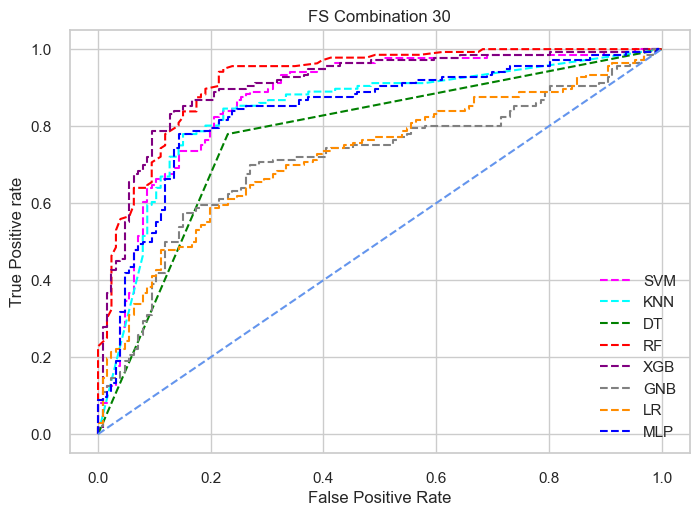

In [53]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr2, tpr2, linestyle = '--', color = 'green', label = 'DT')
plt.plot(fpr3, tpr3, linestyle = '--', color = 'red', label = 'RF')
plt.plot(fpr4, tpr4, linestyle = '--', color = 'purple', label = 'XGB')
plt.plot(fpr11, tpr11, linestyle = '--', color = 'grey', label = 'GNB')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
#plt.plot(fpr6, tpr6, linestyle = '--', color = 'pink', label = 'MNB')

#plt.plot(fpr8, tpr8, linestyle = '--', color = 'cyan', label = 'SGD')
plt.plot(fpr9, tpr9, linestyle = '--', color = 'blue', label = 'MLP')
#plt.plot(fpr10, tpr10, linestyle = '--', color = 'brown', label = 'AB')

#plt.plot(fpr12, tpr12, linestyle = '--', color = 'green', label = 'LR-MLP')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('FS Combination 30')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("FS Combination 30.png",dpi=300)

plt.show();